**Taller 3**
**Laura Betancourt**

In [108]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ousuga/Proyecto1_IAN/main/precios_pdtos_agricolas.cvs'

ver = pd.read_csv(url)

ver

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
9236,Yuca*,neiva,n.d.,n.d.,29ago2023,2.993360,-75.272362
9237,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791
9238,Yuca*,santa,n.d.,n.d.,29ago2023,NaN,NaN


In [132]:
from ssl import VerifyMode
## Lo primero es cambiar los n.d. del DatyaFrame por NA para poder trabajar los datos más adelante

ver.replace("n.d.", np.nan, inplace=True)

## Cambio del formato de fecha
meses = {'ago': 'Aug'}

ver['fecha'] = ver['fecha'].str.replace(r'([a-zA-Z]+)', lambda x: meses.get(x.group(0).lower(), x.group(0)), regex=True)
ver['Fecha'] = pd.to_datetime(ver['fecha'], format='%d%b%Y')

ver

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,Fecha,clasificación,Precio día
0,Arveja verde en vaina,armenia,7200.0,0.10,01Aug2023,6.163684,-75.809955,2023-08-01,Verdura,Normal
2,Arveja verde en vaina,bogotá,7925.0,0.11,01Aug2023,4.316108,-74.181073,2023-08-01,Verdura,Normal
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,01Aug2023,7.155834,-73.111570,2023-08-01,Verdura,Normal
4,Arveja verde en vaina,cali,7733.0,-0.03,01Aug2023,3.399044,-76.576493,2023-08-01,Verdura,Normal
5,Arveja verde en vaina,cúcuta,9417.0,0.11,01Aug2023,7.502182,-72.797034,2023-08-01,Verdura,Alto
...,...,...,...,...,...,...,...,...,...,...
9228,Yuca*,armenia,1640.0,0.00,29Aug2023,6.163684,-75.809955,2023-08-29,Tubérculo,Normal
9231,Yuca*,bucaramanga,2690.0,0.05,29Aug2023,7.155834,-73.111570,2023-08-29,Tubérculo,Alto
9233,Yuca*,cúcuta,2600.0,0.03,29Aug2023,7.502182,-72.797034,2023-08-29,Tubérculo,Alto
9235,Yuca*,medellín,1650.0,0.06,29Aug2023,6.257590,-75.611031,2023-08-29,Tubérculo,Normal


### **1. Justificación de la necesidad de redefinir variables y redefinición si es necesaria**

In [110]:
# Identificar datos no nulos y el tipos de datos
ver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   producto      9240 non-null   object        
 1   ciudad        9240 non-null   object        
 2   precio        7004 non-null   object        
 3   variabilidad  6856 non-null   object        
 4   fecha         9240 non-null   object        
 5   LATITUD       7105 non-null   float64       
 6   LONGITUD      7105 non-null   float64       
 7   Fecha         9240 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 577.6+ KB


In [111]:
## Encuentro la necesidad de redefinir as variables precio y variabilidad, que aparecen en el DataFrame como tipo 'object'
## el cual no es adecuado para realizar las operaciones que se pden en el taller, por lo cual se deben redefinir a datos
## tipo 'float'

# Cambiar el formato de la variable precio
ver['precio'] = ver['precio'].astype('float')
ver['variabilidad'] = ver['variabilidad'].astype('float')
ver[['LATITUD', 'LONGITUD']] = ver[['LATITUD', 'LONGITUD']].astype('object')

ver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   producto      9240 non-null   object        
 1   ciudad        9240 non-null   object        
 2   precio        7004 non-null   float64       
 3   variabilidad  6856 non-null   float64       
 4   fecha         9240 non-null   object        
 5   LATITUD       7105 non-null   object        
 6   LONGITUD      7105 non-null   object        
 7   Fecha         9240 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 577.6+ KB


###**3. Identificación de datos faltantes, justificación y uso de la estrategia de tratamiento de datos faltantes**

In [112]:
#Cuantos valores faltan en cada columna
print(ver.isnull().sum())

producto           0
ciudad             0
precio          2236
variabilidad    2384
fecha              0
LATITUD         2135
LONGITUD        2135
Fecha              0
dtype: int64


Las variables donde se encuentran datos faltantes son 'precio', 'variabilidad', 'LATITUD' Y 'LONGITUD'

In [113]:
## Identificar que ciudades no cuentan con los datos de LATITUD y LONGITUD
na_ciudad = ver.groupby('ciudad')[['LONGITUD', 'LATITUD']].apply(lambda x: x.isna().sum())

# Renombrar las columnas resultantes
na_ciudad.columns = ['Faltantes LONg', 'Faltantes LAT']

# Si deseas, puedes resetear el índice para que 'ciudad' sea una columna en lugar de un índice
na_ciudad.reset_index(inplace=True)

# Imprimir el resultado
print(na_ciudad)

           ciudad  Faltantes LONg  Faltantes LAT
0         armenia               0              0
1    barranquilla               0              0
2          bogotá             665            665
3     bucaramanga               0              0
4            cali               0              0
5       cartagena             350            350
6          cúcuta             455            455
7          ibagué               0              0
8       manizales               0              0
9        medellín               0              0
10       montería               0              0
11          neiva               0              0
12          pasto               0              0
13        pereira               0              0
14        popayán               0              0
15          santa             665            665
16      sincelejo               0              0
17          tunja               0              0
18     valledupar               0              0
19  villavicencio   

In [114]:
## Para obtener LATITUD y LONGITUD de las centrales de abasto de las ciudades que no cuentan con estos datos
## las extraje desde la base de datos del taller 2

from difflib import get_close_matches

df_cities = pd.read_csv('https://raw.githubusercontent.com/endorgobio/SA_visualiser/master/data/DIVIPOLA_Municipios.csv',
                        sep=';',
                        encoding='unicode_escape')

# Arreglos a la columna municipio
df_cities['NOM_MPIO'] = df_cities['NOM_MPIO'].str.replace('.', '')

# Mapeo para cambiar las ciudades que presenan variaciones en los nombres
city_mapping = {
    'SANTA': 'SANTA MARTA',
    'CÚCUTA': 'CUCUTA',
    'CARTAGENA': 'CARTAGENA'
}

# Función para obtener longitud y latitud
def obtener_longitud_latitud(ciudad):
    ciudad = city_mapping.get(ciudad, ciudad)

    dfa = df_cities[df_cities['NOM_MPIO'] == ciudad]

    # Con esto se encuentran valores cercanos si no hay coincidencias
    if dfa.empty:
        close_matches = get_close_matches(ciudad, df_cities['NOM_MPIO'], n=1, cutoff=0.6)
        if close_matches:
            dfa = df_cities[df_cities['NOM_MPIO'] == close_matches[0]]

    if not dfa.empty:
        return dfa['LONGITUD'].values[0], dfa['LATITUD'].values[0]
    else:
        return None, None

ver['LONGITUD'], ver['LATITUD'] = zip(*ver['ciudad'].str.upper().apply(obtener_longitud_latitud))

## Completar las filas NaN en 'LONGITUD' y 'LATITUD' con los valores correspondientes
ver['LONGITUD'].fillna(df_cities['LONGITUD'], inplace=True)
ver['LATITUD'].fillna(df_cities['LATITUD'], inplace=True)

ver.isnull()

<ipython-input-114-54c0fcb48432>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cities['NOM_MPIO'] = df_cities['NOM_MPIO'].str.replace('.', '')


,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,Fecha
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9235,False,False,False,False,False,False,False,False
9236,False,False,True,True,False,False,False,False
9237,False,False,False,False,False,False,False,False
9238,False,False,True,True,False,False,False,False


In [116]:
# Imprimir las filas donde 'precio' y 'variabilidad' sus datos son nulos
nulos_coincidentes = ver[ver['precio'].isnull() & ver['variabilidad'].isnull()]

print(nulos_coincidentes)

                     producto   ciudad  precio  variabilidad      fecha  \
10      Arveja verde en vaina    santa     NaN           NaN  01Aug2023   
20    Cebolla cabezona blanca    neiva     NaN           NaN  01Aug2023   
30              Cebolla junca   ibagué     NaN           NaN  01Aug2023   
34              Cebolla junca    santa     NaN           NaN  01Aug2023   
45            Chócolo mazorca  pereira     NaN           NaN  01Aug2023   
...                       ...      ...     ...           ...        ...   
9232                    Yuca*     cali     NaN           NaN  29Aug2023   
9234                    Yuca*   ibagué     NaN           NaN  29Aug2023   
9236                    Yuca*    neiva     NaN           NaN  29Aug2023   
9238                    Yuca*    santa     NaN           NaN  29Aug2023   
9239                    Yuca*    tunja     NaN           NaN  29Aug2023   

        LATITUD   LONGITUD      Fecha  
10    11.121894 -73.885279 2023-08-01  
20     2.993360 -75

In [117]:
## Se observó en las variables precio y variabilidad coincidian en una gran cantidad de datos nulos, por lo que
## se puede suponer que ese producto no lo comercializan en la respectiva central de abasto, por lo cual se eliminan.

ver = ver.dropna(subset=["precio", "variabilidad"], how='all')

## Repito
na_pro = ver.groupby('producto')[['precio', 'variabilidad']].apply(lambda x: x.isna().sum())
na_pro.columns = ['Fal precio', 'Fal var']
na_pro.reset_index(inplace=True)
# Imprimir el resultado
print(na_pro)

                   producto  Fal precio  Fal var
0                Aguacate *           0        1
1                 Aguacate*           0        0
2                Arracacha*           0        5
3     Arveja verde en vaina           0        5
4                   Banano*           0        1
5   Cebolla cabezona blanca           0        1
6             Cebolla junca           0        2
7           Chócolo mazorca           0        3
8                      Coco           0        6
9             Fríjol verde*           0        1
10               Granadilla           0        9
11                 Guayaba*           0        2
12               Habichuela           0        5
13          Lechuga batavia           0       10
14             Limón Tahití           0        3
15              Limón común           0        9
16                     Lulo           0        4
17               Mandarina*           0        6
18              Mango tommy           0        7
19       Manzana roy

In [118]:
## Para los NaN que aún quedaban en variabilidad los impute con el promedio de la varaibilidad del producto al que correspondia el NaN

variabilidad_promedio = ver.groupby('producto')['variabilidad'].transform('mean')
ver['variabilidad'].fillna(variabilidad_promedio, inplace=True)

ver.head(20)

<ipython-input-118-40418b3e774f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ver['variabilidad'].fillna(variabilidad_promedio, inplace=True)


,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,Fecha
0,Arveja verde en vaina,armenia,7200.0,0.100000,01Aug2023,6.163684,-75.809955,2023-08-01
1,Arveja verde en vaina,armenia,7200.0,0.100000,01Aug2023,6.163684,-75.809955,2023-08-01
2,Arveja verde en vaina,bogotá,7925.0,0.110000,01Aug2023,4.316108,-74.181073,2023-08-01
3,Arveja verde en vaina,bucaramanga,6860.0,0.080000,01Aug2023,7.155834,-73.111570,2023-08-01
4,Arveja verde en vaina,cali,7733.0,-0.030000,01Aug2023,3.399044,-76.576493,2023-08-01
5,Arveja verde en vaina,cúcuta,9417.0,0.110000,01Aug2023,7.502182,-72.797034,2023-08-01
6,Arveja verde en vaina,ibagué,6000.0,-0.010000,01Aug2023,4.451921,-75.252591,2023-08-01
7,Arveja verde en vaina,medellín,5950.0,-0.013264,01Aug2023,6.257590,-75.611031,2023-08-01
8,Arveja verde en vaina,neiva,5653.0,-0.120000,01Aug2023,2.993360,-75.272362,2023-08-01
9,Arveja verde en vaina,pereira,7200.0,-0.013264,01Aug2023,4.803663,-75.795791,2023-08-01


###**4. Identificación de datos duplicados, justificación y uso de la estrategia de tratamiento de datos duplicados**

In [119]:
## Para esta base de datos solo nos importa si hay una fila donde todas sus variables estan duplicadas
## pues serían un proucto repetido en la misma ciudad, con el mismo precio y la misma variabilidad.

filas_duplicadas = ver.duplicated(subset=None, keep=False)

filas_con_valores_repetidos = ver[filas_duplicadas]

# Imprimir el DataFrame resultante
print(filas_con_valores_repetidos)

                     producto   ciudad  precio  variabilidad      fecha  \
0       Arveja verde en vaina  armenia  7200.0          0.10  01Aug2023   
1       Arveja verde en vaina  armenia  7200.0          0.10  01Aug2023   
12    Cebolla cabezona blanca  armenia  2000.0          0.09  01Aug2023   
13    Cebolla cabezona blanca  armenia  2000.0          0.09  01Aug2023   
24              Cebolla junca  armenia  2286.0          0.00  01Aug2023   
...                       ...      ...     ...           ...        ...   
9193             Papa criolla  armenia  3889.0         -0.04  29Aug2023   
9216     Plátano hartón verde  armenia  2067.0          0.11  29Aug2023   
9217     Plátano hartón verde  armenia  2067.0          0.11  29Aug2023   
9228                    Yuca*  armenia  1640.0          0.00  29Aug2023   
9229                    Yuca*  armenia  1640.0          0.00  29Aug2023   

       LATITUD   LONGITUD      Fecha  
0     6.163684 -75.809955 2023-08-01  
1     6.163684 -75.80

In [120]:
## Se eliminaron los las filas repetidas que corresponden a la ciudad de Pereira
ver = ver.drop_duplicates(subset=None, keep='first')
ver

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,Fecha
0,Arveja verde en vaina,armenia,7200.0,0.10,01Aug2023,6.163684,-75.809955,2023-08-01
2,Arveja verde en vaina,bogotá,7925.0,0.11,01Aug2023,4.316108,-74.181073,2023-08-01
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,01Aug2023,7.155834,-73.111570,2023-08-01
4,Arveja verde en vaina,cali,7733.0,-0.03,01Aug2023,3.399044,-76.576493,2023-08-01
5,Arveja verde en vaina,cúcuta,9417.0,0.11,01Aug2023,7.502182,-72.797034,2023-08-01
...,...,...,...,...,...,...,...,...
9228,Yuca*,armenia,1640.0,0.00,29Aug2023,6.163684,-75.809955,2023-08-29
9231,Yuca*,bucaramanga,2690.0,0.05,29Aug2023,7.155834,-73.111570,2023-08-29
9233,Yuca*,cúcuta,2600.0,0.03,29Aug2023,7.502182,-72.797034,2023-08-29
9235,Yuca*,medellín,1650.0,0.06,29Aug2023,6.257590,-75.611031,2023-08-29


###**2. Justificación de la necesidad de categorizar variables y categorización si es necesaria.**

In [121]:
## Dentro de la base de datos pude identificar que los productos pertenecian a tres categorias dentro de los alimentos
## Por lo cual decidí catecorizarlos según estas, las cuales son verduras, frutas y tubérculos

# Definir las listas de productos
fruta = ['Aguacate*', 'Banano', 'Coco', 'Granadilla', 'Guayaba*', 'Limón común', 'Limón Tahití', 'Lulo', 'Mandarina*', 'Mango tommy', 'Manzana royal gala', 'Maracuyá', 'Mora de Castilla', 'Naranja', 'Papaya maradol', 'Piña', 'Tomate de árbol']
verdura = ['Arveja verde en vaina', 'Cebolla cabezona blanca', 'Cebolla junca', 'Chócolo mazorca', 'Fríjol verde*', 'Habichuela', 'Lechuga batavia', 'Pepino cohombro', 'Pimentón', 'Remolacha', 'Tomate*', 'Zanahoria']
tuberculo = ['Arracacha*', 'Papa negra*', 'Papa criolla', 'Plátano guineo', 'Plátano hartón verde', 'Yuca*', 'Aguacate *', 'Papa criolla']

# Categorizar los productos
ver.loc[ver['producto'].isin(fruta), 'clasificación'] = 'Fruta'
ver.loc[ver['producto'].isin(verdura), 'clasificación'] = 'Verdura'
ver.loc[ver['producto'].isin(tuberculo), 'clasificación'] = 'Tubérculo'

# Imprimir el DataFrame categorizado
ver


,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,Fecha,clasificación
0,Arveja verde en vaina,armenia,7200.0,0.10,01Aug2023,6.163684,-75.809955,2023-08-01,Verdura
2,Arveja verde en vaina,bogotá,7925.0,0.11,01Aug2023,4.316108,-74.181073,2023-08-01,Verdura
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,01Aug2023,7.155834,-73.111570,2023-08-01,Verdura
4,Arveja verde en vaina,cali,7733.0,-0.03,01Aug2023,3.399044,-76.576493,2023-08-01,Verdura
5,Arveja verde en vaina,cúcuta,9417.0,0.11,01Aug2023,7.502182,-72.797034,2023-08-01,Verdura
...,...,...,...,...,...,...,...,...,...
9228,Yuca*,armenia,1640.0,0.00,29Aug2023,6.163684,-75.809955,2023-08-29,Tubérculo
9231,Yuca*,bucaramanga,2690.0,0.05,29Aug2023,7.155834,-73.111570,2023-08-29,Tubérculo
9233,Yuca*,cúcuta,2600.0,0.03,29Aug2023,7.502182,-72.797034,2023-08-29,Tubérculo
9235,Yuca*,medellín,1650.0,0.06,29Aug2023,6.257590,-75.611031,2023-08-29,Tubérculo


In [122]:
## Para una segunda categorización lo que hice fue categorizar el precio diarío de los productos, agrupando según el producto y la fecha,
## para posteriormente definir las categorias 'Alto', 'Bajo' y 'Normal' si los datos se encontraban un 20% por encima y por debajo
## de la media del precio.

media_precio = ver.groupby(['producto', 'fecha'])['precio'].transform('mean')

diferencia = ver['precio'] - media_precio

limite_superior = 0.2 * media_precio
limite_inferior = -0.2 * media_precio

ver.loc[diferencia > limite_superior, 'Precio día'] = 'Alto'
ver.loc[(diferencia >= limite_inferior) & (diferencia <= limite_superior), 'Precio día'] = 'Normal'
ver.loc[diferencia < limite_inferior, 'Precio día'] = 'Bajo'

ver

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,Fecha,clasificación,Precio día
0,Arveja verde en vaina,armenia,7200.0,0.10,01Aug2023,6.163684,-75.809955,2023-08-01,Verdura,Normal
2,Arveja verde en vaina,bogotá,7925.0,0.11,01Aug2023,4.316108,-74.181073,2023-08-01,Verdura,Normal
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,01Aug2023,7.155834,-73.111570,2023-08-01,Verdura,Normal
4,Arveja verde en vaina,cali,7733.0,-0.03,01Aug2023,3.399044,-76.576493,2023-08-01,Verdura,Normal
5,Arveja verde en vaina,cúcuta,9417.0,0.11,01Aug2023,7.502182,-72.797034,2023-08-01,Verdura,Alto
...,...,...,...,...,...,...,...,...,...,...
9228,Yuca*,armenia,1640.0,0.00,29Aug2023,6.163684,-75.809955,2023-08-29,Tubérculo,Normal
9231,Yuca*,bucaramanga,2690.0,0.05,29Aug2023,7.155834,-73.111570,2023-08-29,Tubérculo,Alto
9233,Yuca*,cúcuta,2600.0,0.03,29Aug2023,7.502182,-72.797034,2023-08-29,Tubérculo,Alto
9235,Yuca*,medellín,1650.0,0.06,29Aug2023,6.257590,-75.611031,2023-08-29,Tubérculo,Normal


###**5. Identificación de datos outliers, justificación y uso de la estrategia de tratamiento de datos outliers.**

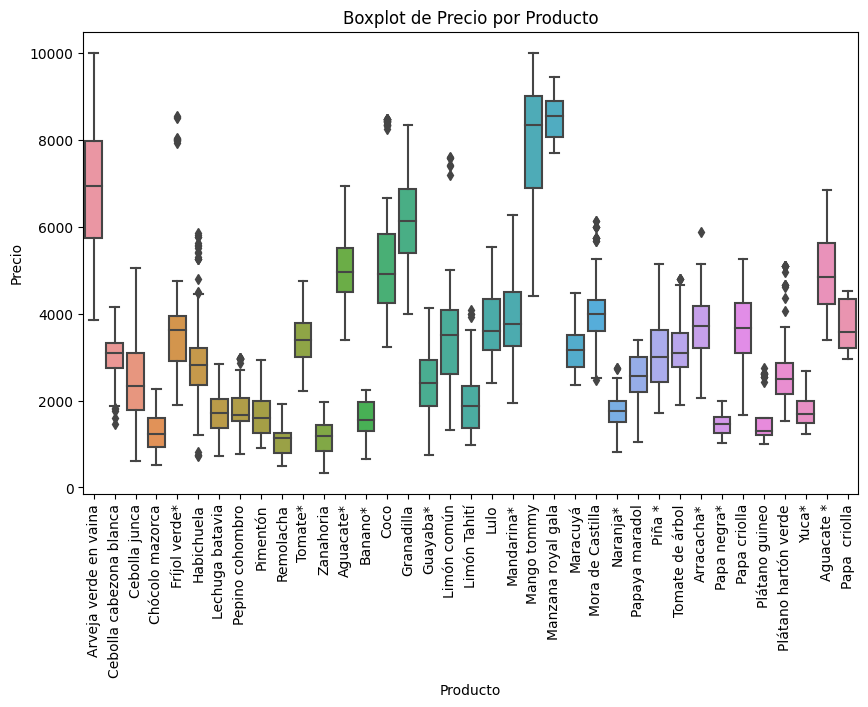

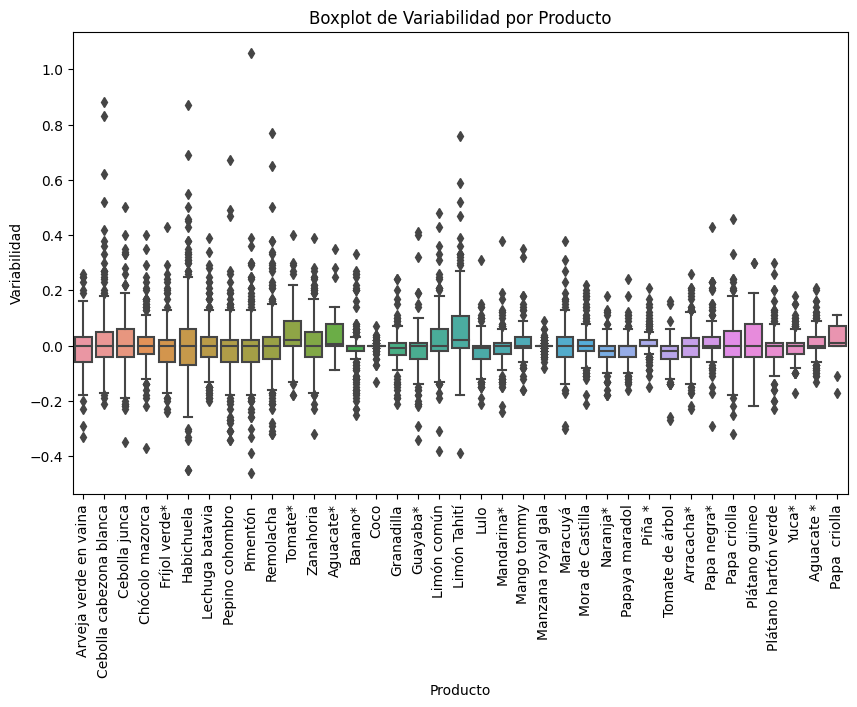

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de precio por producto
plt.figure(figsize=(10, 6))
sns.boxplot(x='producto', y='precio', data=ver)
plt.title('Boxplot de Precio por Producto')
plt.xlabel('Producto')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

# Boxplot de variabilidad por producto
plt.figure(figsize=(10, 6))
sns.boxplot(x='producto', y='variabilidad', data=ver)
plt.title('Boxplot de Variabilidad por Producto')
plt.xlabel('Producto')
plt.ylabel('Variabilidad')
plt.xticks(rotation=90)
plt.show()

In [124]:
## Basado en los boxplot de ambas variables, decido realizar una segunda evaluación de los outliers con el rango Intercuartílico
## y determinar el porcentaje de Outliers que hay en ambas variables.

umbral = 1.5
info = []

for variable in ver.describe().columns:
    Q1 = ver.describe().at['25%', variable]
    Q3 = ver.describe().at['75%', variable]
    RIC = Q3 - Q1

    Max = Q3 + (umbral * RIC)
    Min = Q1 - (umbral * RIC)

    outliers = ver[(ver[variable] < Min) | (ver[variable] > Max)]

    info.append([variable, Min, Q1, Q3, Max, RIC, len(outliers)])

ric = pd.DataFrame(info, columns=['Variable', 'Min', 'Q1', 'Q3', 'Max', 'RIC', 'Cantidad de Outliers'])
ric['% de Outliers'] = (ric['Cantidad de Outliers'] / len(ver)) * 100
ric

,Variable,Min,Q1,Q3,Max,RIC,Cantidad de Outliers,% de Outliers
0,precio,-1629.500000,1708.000000,3933.000000,7270.500000,2225.000000,423,6.342780
1,variabilidad,-0.105000,-0.030000,0.020000,0.095000,0.050000,1203,18.038686
2,LATITUD,0.056519,4.316108,7.155834,11.415422,2.839726,0,0.000000
3,LONGITUD,-79.250103,-75.795791,-73.492916,-70.038603,2.302875,0,0.000000


In [125]:
## Decidí winzorizar ambas variables

from scipy.stats.mstats import winsorize

# limites
lower_limit = 0.10
upper_limit = 0.10

def winsorize_by_group(group):
    group['precio'] = winsorize(group['precio'], limits=(lower_limit, upper_limit))
    group['variabilidad'] = winsorize(group['variabilidad'], limits=(lower_limit, upper_limit))
    return group

ver_winsorized = ver.groupby('producto').apply(winsorize_by_group)

<ipython-input-125-13d1e0647562>:14: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ver_winsorized = ver.groupby('producto').apply(winsorize_by_group)


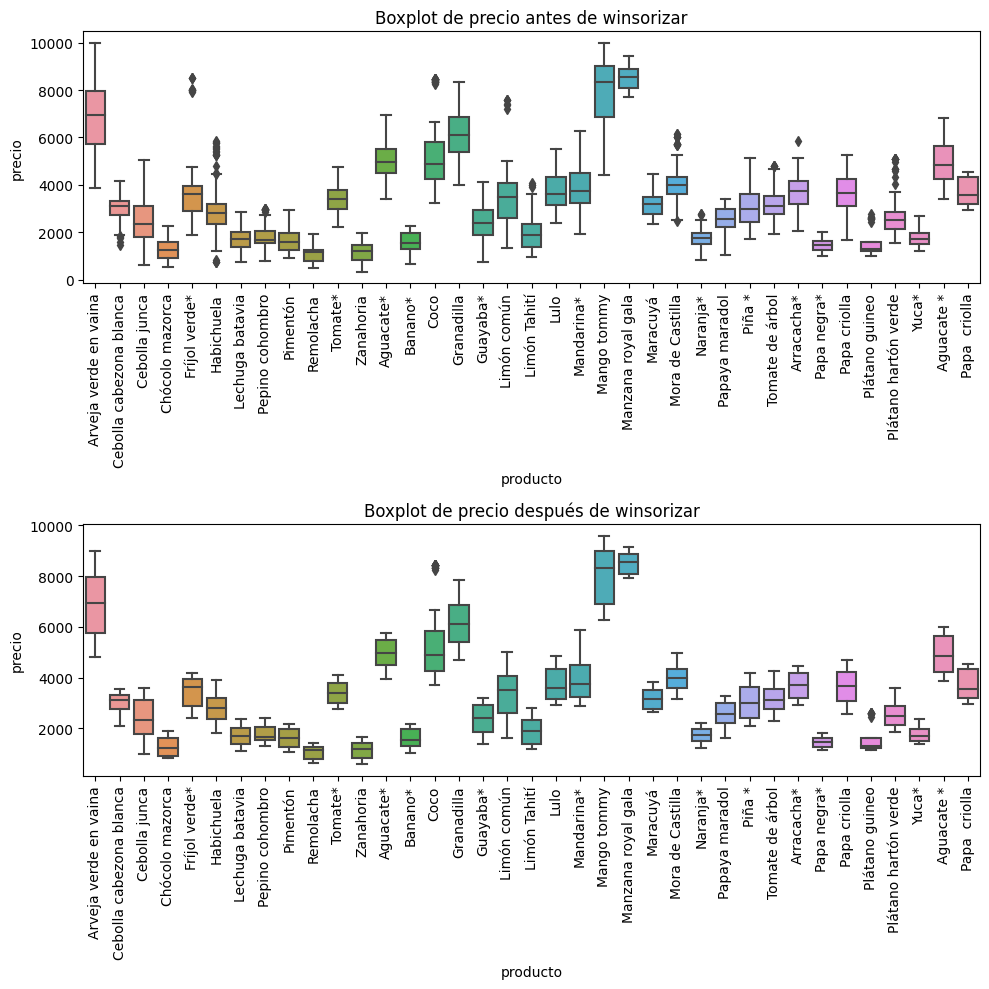

In [126]:

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Boxplot antes de la winsorización (arriba)
sns.boxplot(data=ver, x='producto', y='precio', ax=axes[0])
axes[0].set_title('Boxplot de precio antes de winsorizar')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Girar etiquetas

# Boxplot después de la winsorización (abajo)
sns.boxplot(data=ver_winsorized, x='producto', y='precio', ax=axes[1])
axes[1].set_title('Boxplot de precio después de winsorizar')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Girar etiquetas

# Espacio entre subplots
plt.tight_layout()

plt.show()

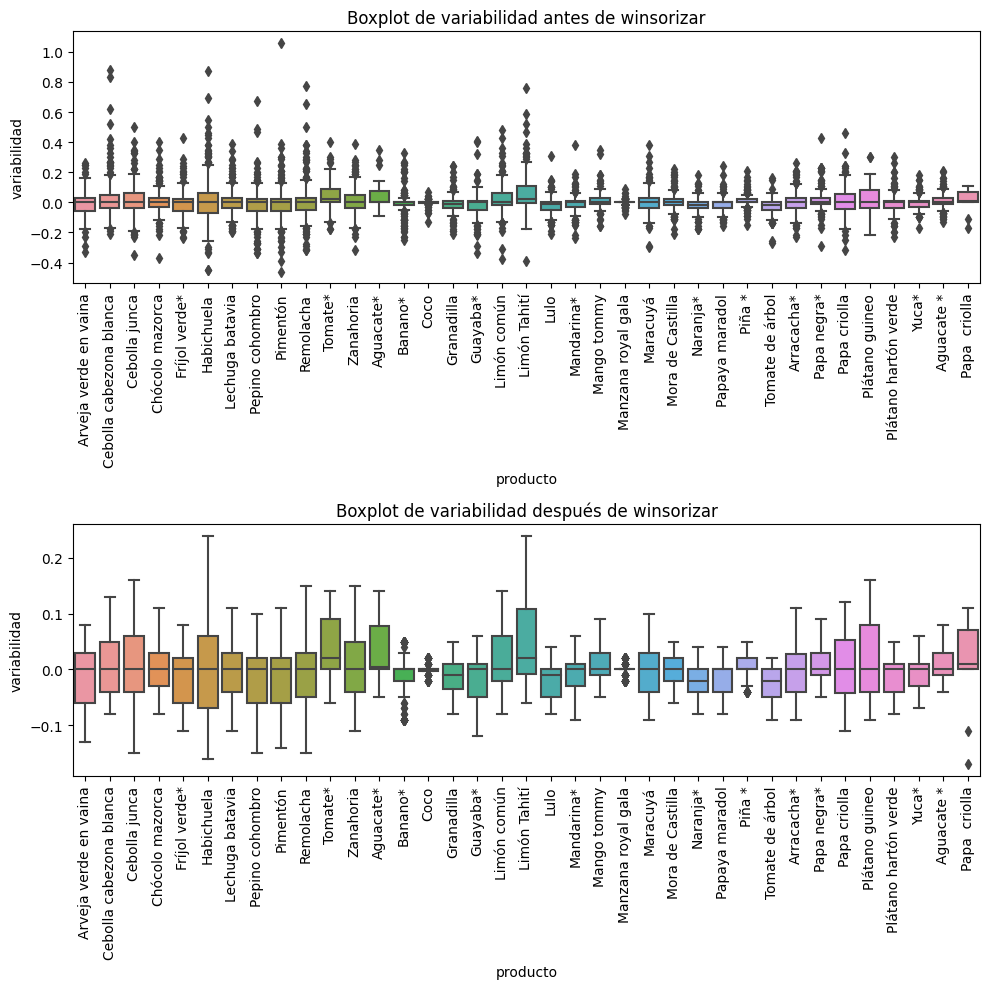

In [127]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Boxplot antes de la winsorización (arriba)
sns.boxplot(data=ver, x='producto', y='variabilidad', ax=axes[0])
axes[0].set_title('Boxplot de variabilidad antes de winsorizar')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Girar etiquetas

# Boxplot después de la winsorización (abajo)
sns.boxplot(data=ver_winsorized, x='producto', y='variabilidad', ax=axes[1])
axes[1].set_title('Boxplot de variabilidad después de winsorizar')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Girar etiquetas

# Espacio entre subplots
plt.tight_layout()

plt.show()

### 8.	Mínimo 5 gráficos que sean de interés para entender el problema.

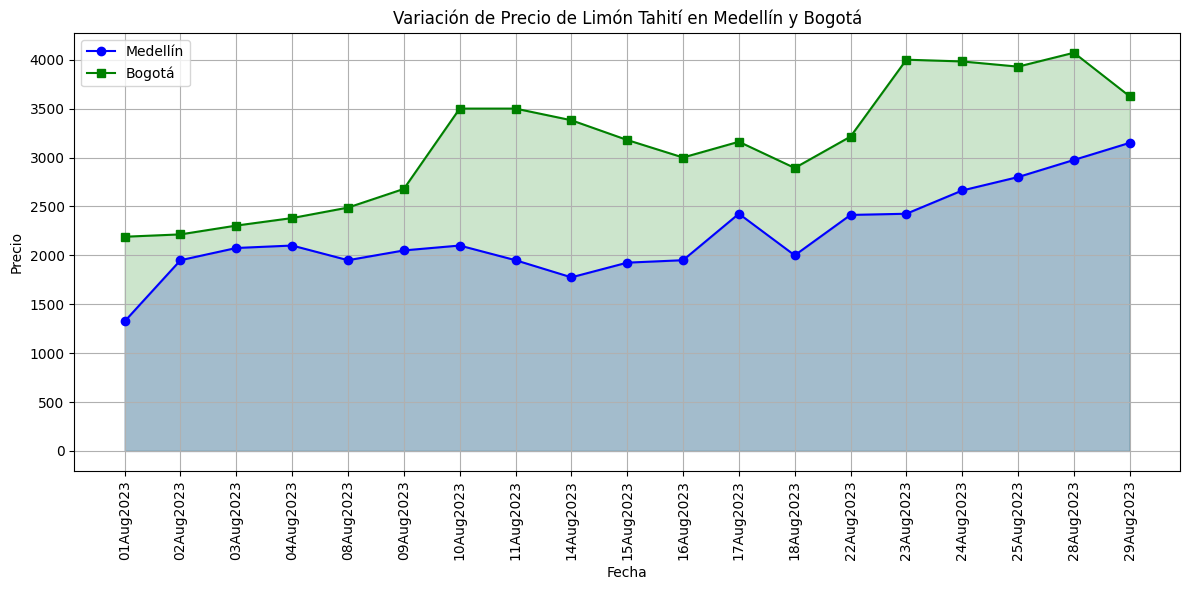

In [135]:
# Filtra solo los datos de las ciudades de Medellín y Bogotá
medellin_data = ver[ver['ciudad'] == 'medellín']
bogota_data = ver[ver['ciudad'] == 'bogotá']

producto = 'Limón Tahití'
product_data_medellin = medellin_data[medellin_data['producto'] == producto]
product_data_bogota = bogota_data[bogota_data['producto'] == producto]

plt.figure(figsize=(12, 6))
plt.plot(product_data_medellin['fecha'], product_data_medellin['precio'], label='Medellín', marker='o', color='blue')
plt.plot(product_data_bogota['fecha'], product_data_bogota['precio'], label='Bogotá', marker='s', color='green')

plt.legend()
plt.title(f'Variación de Precio de {producto} en Medellín y Bogotá')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=90)

plt.fill_between(product_data_medellin['fecha'], product_data_medellin['precio'], alpha=0.2, color='blue')
plt.fill_between(product_data_bogota['fecha'], product_data_bogota['precio'], alpha=0.2, color='green')

plt.grid(True)
plt.tight_layout()
plt.show()



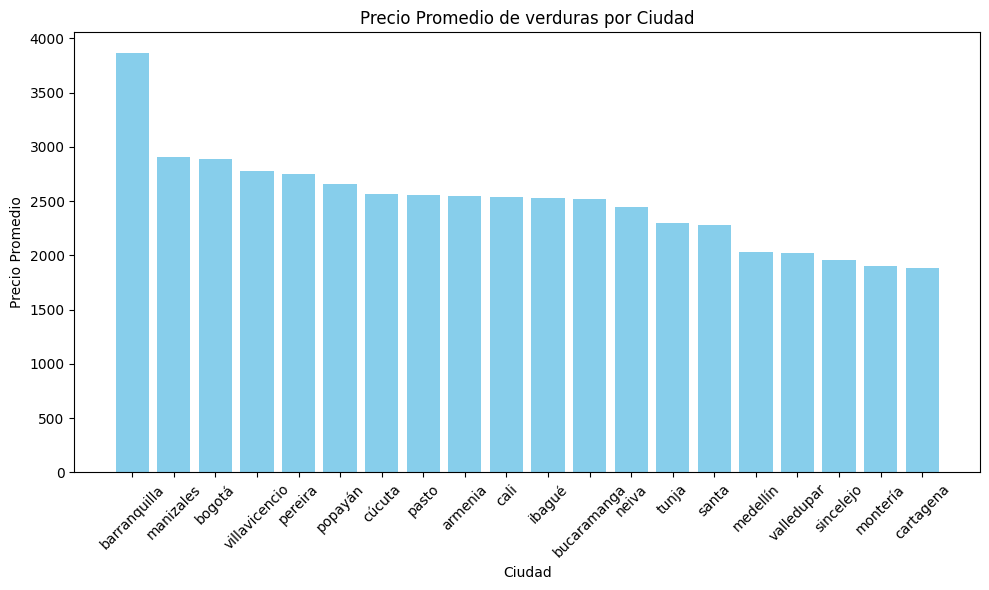

In [138]:
# Filtra solo los datos de la categoría 'Verdura'
frutas_data = ver[ver['clasificación'] == 'Verdura']

precio_promedio_por_ciudad = frutas_data.groupby('ciudad')['precio'].mean()

precio_promedio_por_ciudad = precio_promedio_por_ciudad.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(precio_promedio_por_ciudad.index, precio_promedio_por_ciudad.values, color='skyblue')

plt.title('Precio Promedio de verduras por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)

# Muestra el gráfico
plt.tight_layout()
plt.show()


<ipython-input-146-7b4310971c55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cucuta_zanahoria_data['fecha'] = pd.to_datetime(cucuta_zanahoria_data['fecha'], format='%d%b%Y')


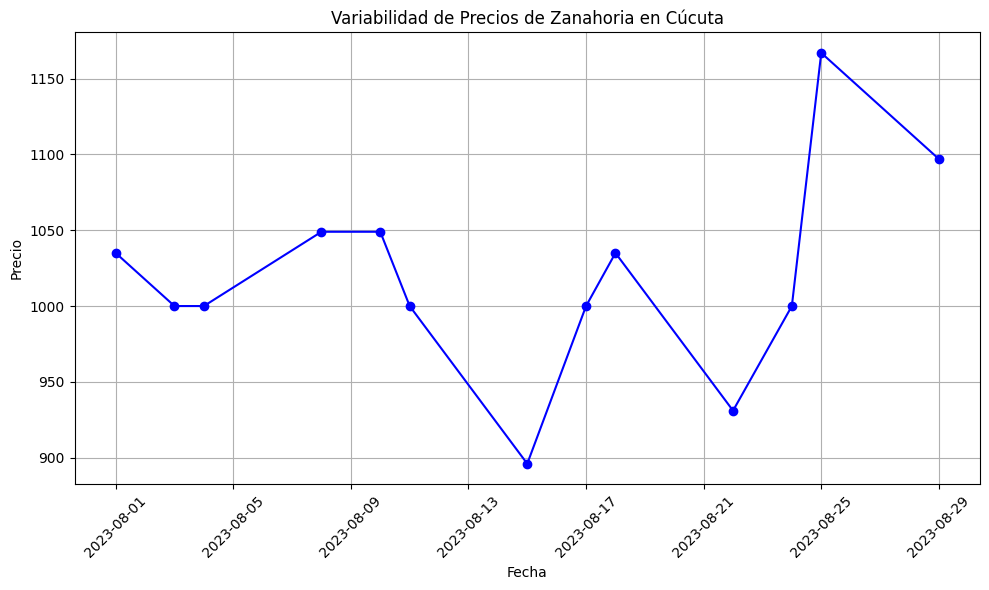

In [146]:
cucuta_zanahoria_data = ver[(ver['ciudad'] == 'cúcuta') & (ver['producto'] == 'Zanahoria')]
cucuta_zanahoria_data['fecha'] = pd.to_datetime(cucuta_zanahoria_data['fecha'], format='%d%b%Y')

plt.figure(figsize=(10, 6))
plt.plot(cucuta_zanahoria_data['fecha'], cucuta_zanahoria_data['precio'], marker='o', color='blue')

plt.title('Variabilidad de Precios de Zanahoria en Cúcuta')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


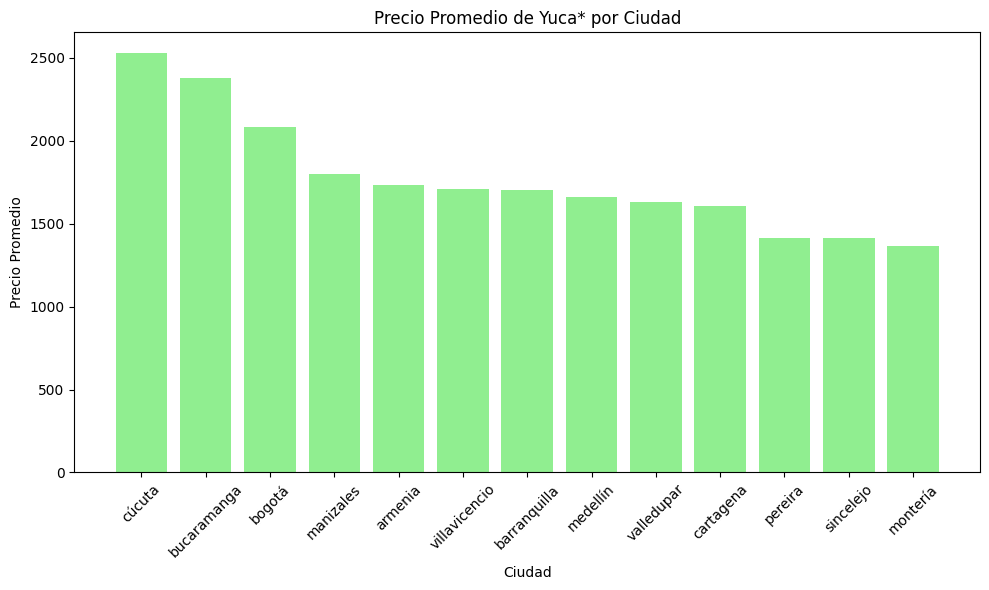

In [147]:
yuca_data = ver[ver['producto'] == 'Yuca*']

precio_promedio_por_ciudad = yuca_data.groupby('ciudad')['precio'].mean()
precio_promedio_por_ciudad = precio_promedio_por_ciudad.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(precio_promedio_por_ciudad.index, precio_promedio_por_ciudad.values, color='lightgreen')

plt.title('Precio Promedio de Yuca* por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


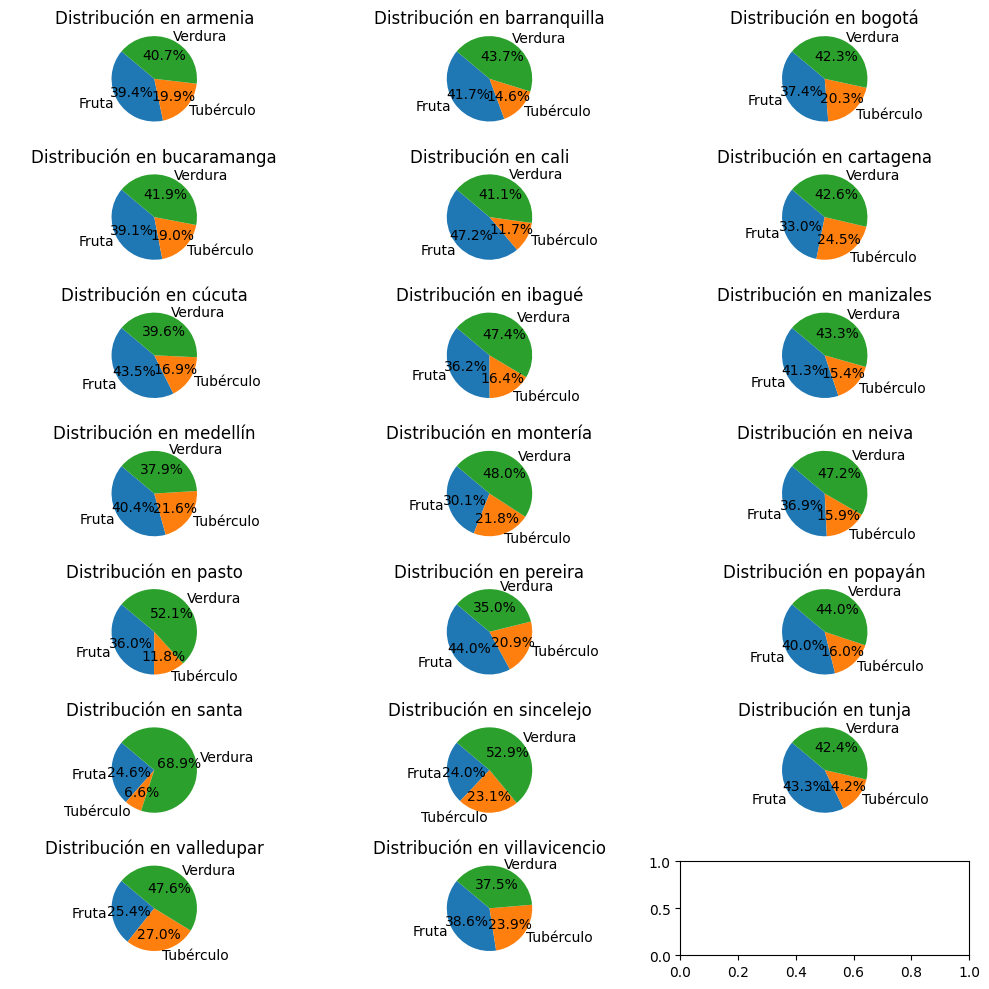

In [160]:
tabla_contingencia = pd.crosstab(ver['ciudad'], ver['clasificación'])

num_filas = len(tabla_contingencia.index) // 3 + 1
num_columnas = 3

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(10, 10))

for i, ciudad in enumerate(tabla_contingencia.index):
    fila = i // num_columnas
    columna = i % num_columnas
    clasificacion_counts = tabla_contingencia.loc[ciudad]
    axs[fila, columna].pie(clasificacion_counts, labels=clasificacion_counts.index, autopct='%1.1f%%', startangle=140)
    axs[fila, columna].set_title(f'Distribución en {ciudad}')
    axs[fila, columna].axis('equal')

plt.tight_layout()

plt.show()
